In [36]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import lightning.pytorch as pl
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor
from src.model import Autoencoder
from src.data import ReflectionDataModule
from src.utils import GenerateCallback
from src.utils import get_train_images
from torchvision.transforms import transforms, ToPILImage
from torchmetrics import StructuralSimilarityIndexMeasure

In [52]:
latent_dim = 64

In [53]:
transform = transforms.Compose(
            [
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

In [54]:
module = Autoencoder(latent_dim, learning_rate)
module = module.load_from_checkpoint("out/final/epoch=999-step=3000.ckpt")

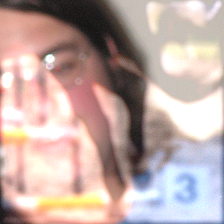

In [60]:
img_path = "data/2011_006315-input.png"
img = Image.open(img_path)
img

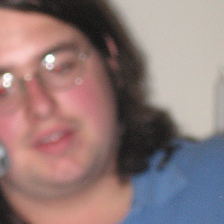

In [61]:
label_path = img_path.replace("input", "label1")
label = Image.open(label_path)
label

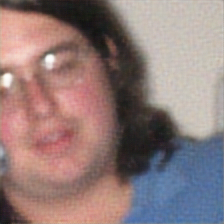

In [62]:
inp = transform(img)
with torch.no_grad():
    out = module(inp.unsqueeze(0))[0]
ToPILImage()((out+1.)/2.)

In [63]:
StructuralSimilarityIndexMeasure()(inp.unsqueeze(0), out.unsqueeze(0))

tensor(0.3239)